In [1]:
#basic imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("/content/SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
for i in df:
  if df[i].dtype=="O":
    print(f'{i} : {df[i].nunique()}')
    print(f'---------------------------------------------------')
    print(f'{i} : {df[i].unique()}')
    print("************************************************************************************")

Ship Mode : 4
---------------------------------------------------
Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
************************************************************************************
Segment : 3
---------------------------------------------------
Segment : ['Consumer' 'Corporate' 'Home Office']
************************************************************************************
Country : 1
---------------------------------------------------
Country : ['United States']
************************************************************************************
City : 531
---------------------------------------------------
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Dur

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.shape

(9994, 13)

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

So there are no null values in our data.

In [8]:
for i in df:
  print(f'{i} :{df[i].dtype}')

Ship Mode :object
Segment :object
Country :object
City :object
State :object
Postal Code :int64
Region :object
Category :object
Sub-Category :object
Sales :float64
Quantity :int64
Discount :float64
Profit :float64


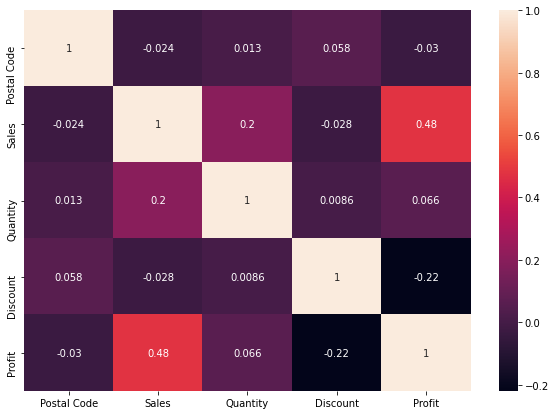

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Here we can find that the sales are directly proportional to the Profit

In [10]:
#columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

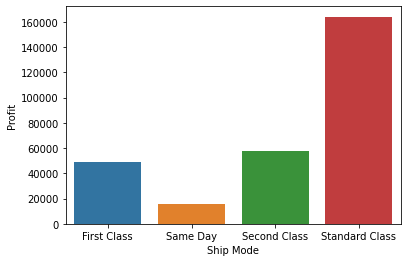

In [11]:
#Lets compare Ship Mode and Profit
SP=df.groupby(["Ship Mode"],sort=True,as_index=False)["Profit"].sum()
sns.barplot(SP["Ship Mode"],SP.Profit)

From the above graph we can clearly see that standard class is earning more profit compared to other classes

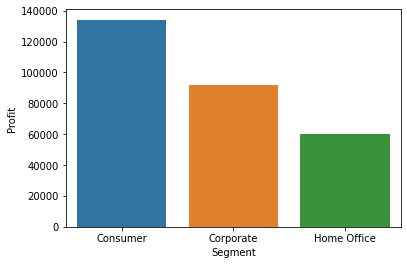

In [12]:
Seg=df.groupby("Segment",sort=True,as_index=False)["Profit"].sum()
sns.barplot(Seg.Segment,Seg.Profit)

consumer segment is getting more profit as per above visualizations

In [13]:
df.duplicated().sum()

17

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
pd.pivot_table(df,index="Ship Mode",columns="Segment",values="Profit",aggfunc='sum')

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,21357.8598,14464.4724,13131.3239
Same Day,9874.2054,1818.1418,4179.5397
Second Class,24940.6904,18231.9501,14274.0111
Standard Class,77834.6857,57440.4155,28694.1268


Profit coming from the Standard  class is high when compared to other classes

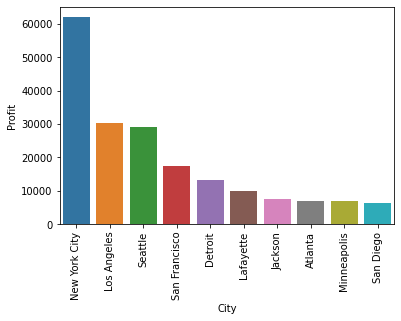

In [16]:
city=df.groupby("City",as_index=False)["Profit"].sum().sort_values("Profit",ascending=False).head(10)
sns.barplot(city.City,city.Profit)
plt.xticks(rotation=90)
plt.show()


From the above visualization we can see that New York City is getting more profit compared to other cities

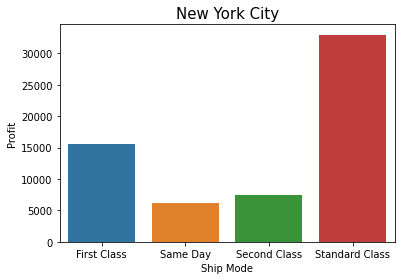

In [17]:
city1=df[df.City=="New York City"].groupby("Ship Mode",as_index=False)["Profit"].sum()
plt.title("New York City",fontsize=15)
sns.barplot(city1["Ship Mode"],city1.Profit)

even in New York City,standard class is getting more profit.

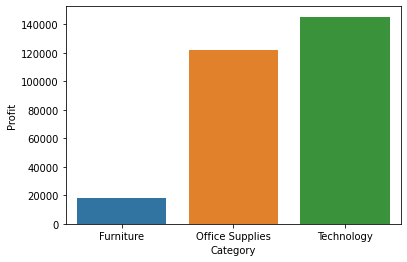

In [19]:
cate=df.groupby("Category",as_index=False,sort=True)["Profit"].sum()
sns.barplot(cate.Category,cate.Profit)

Technology and Office supplies category are the things with high profit

In [100]:
df["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

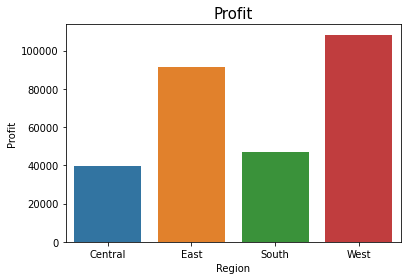

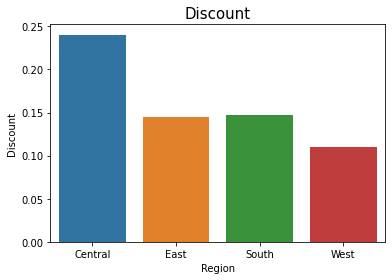

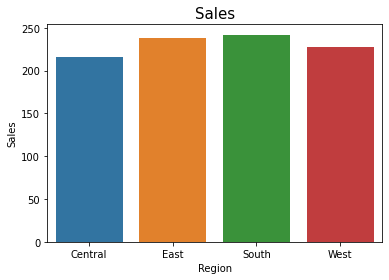

In [23]:
p=df.groupby(["Region"],as_index=False,sort=True)["Profit"].sum()
plt.title("Profit",fontsize=15)
sns.barplot(p.Region,p.Profit)
plt.show()
plt.title("Discount",fontsize=15)
a=df.groupby(["Region"],as_index=False)["Discount"].mean()
sns.barplot(a.Region,a.Discount)
plt.show()
plt.title("Sales",fontsize=15)
c=df.groupby(["Region"],as_index=False)["Sales"].mean()
sns.barplot(c.Region,c.Sales)
plt.show()

From the above visualizations we can conclude that region with high discount got low profit and the region with low discount got high Profit compared to the rest.

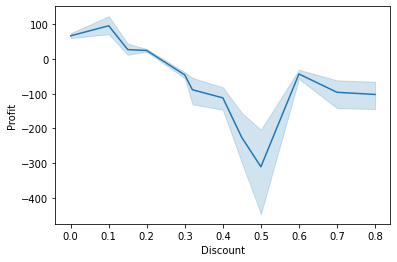

In [31]:
#lets plot the lineplot to determine the relation ship between discount and profit in detail
sns.lineplot(df.Discount,df.Profit)

In [58]:
df.groupby(["City","Sub-Category"],as_index=False,sort=True)["Profit"].sum().sort_values("Profit",ascending= False)

,City,Sub-Category,Profit
1857,New York City,Machines,14568.8253
1859,New York City,Phones,10765.4969
1315,Lafayette,Copiers,8399.9760
1849,New York City,Binders,8372.9469
2555,Seattle,Copiers,8290.4449
...,...,...,...
334,Burlington,Machines,-3839.9904
2431,San Antonio,Binders,-4204.7558
436,Chicago,Binders,-4905.1274
1377,Lancaster,Machines,-6599.9780


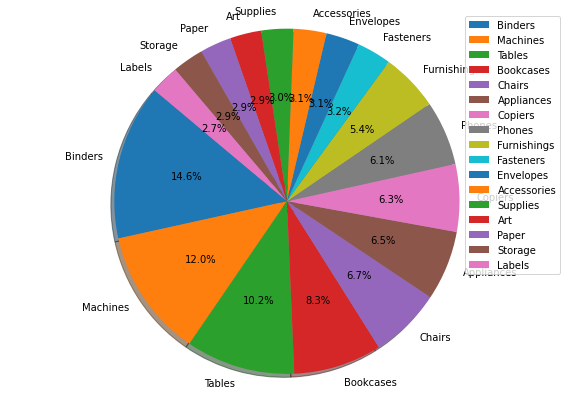

In [51]:
pie1=df.groupby(["Sub-Category"],as_index=False,sort=True)["Discount"].mean().sort_values("Discount",ascending= False)
plt.figure(figsize=(10,7))
plt.pie(pie1.Discount,labels=pie1["Sub-Category"],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

Discount given on Binders,Machines,Tables,Bookcases,and chairs are high compared to the rest

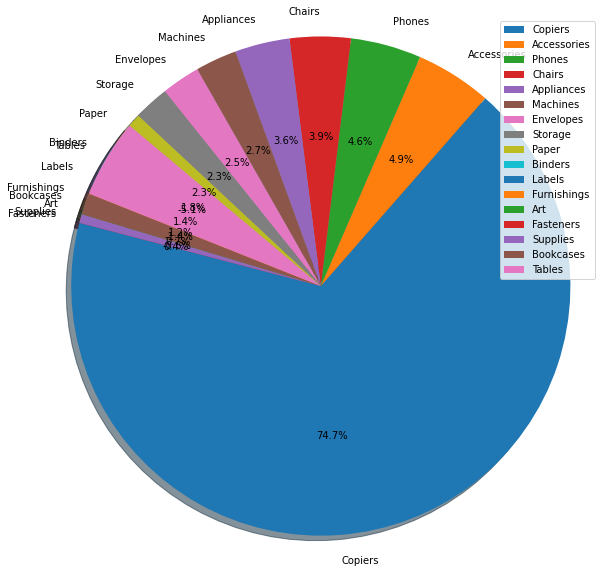

In [101]:

pie1=df.groupby(["Sub-Category"],as_index=False,sort=True)["Profit"].mean().sort_values("Profit",ascending= False)
plt.figure(figsize=(10,10))
plt.pie(pie1.Profit,labels=pie1["Sub-Category"],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

Copiers and Accessories are generating more profit

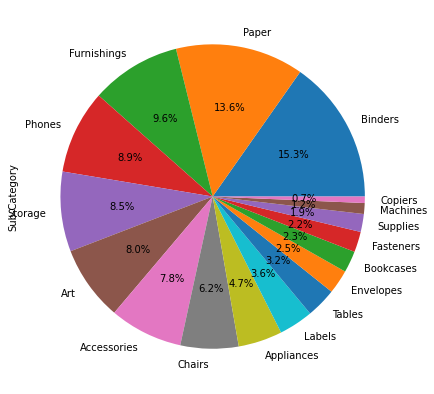

In [50]:
plt.figure(figsize=(10,7))
df['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

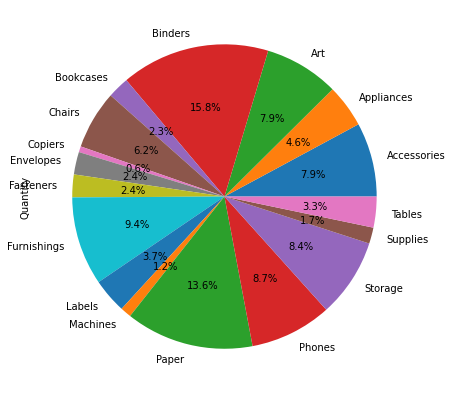

In [107]:
plt.figure(figsize=(10,7))
df.groupby("Sub-Category")["Quantity"].sum().plot(kind="pie",autopct='%1.1f%%')


In [56]:
df.groupby(["Segment"],as_index=True).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


consumer products are generating more profits

In [72]:
df.groupby(["City",'State'], as_index = False, sort = True)['Profit'].sum().sort_values("Profit") 

,City,State,Profit
430,Philadelphia,Pennsylvania,-13843.2106
239,Houston,Texas,-10175.1755
499,San Antonio,Texas,-7299.0502
283,Lancaster,Ohio,-7149.6180
90,Chicago,Illinois,-6648.3318
...,...,...,...
143,Detroit,Michigan,13146.6935
503,San Francisco,California,17466.1186
517,Seattle,Washington,29121.6825
312,Los Angeles,California,30431.4267


Here is the loss and profit data
where top 5 rows are the cities facing huge loss
and bottom 5 rows are the cities with good profit

In [96]:
Loss=df[df.Profit<0]
profit=df[df.Profit>0]

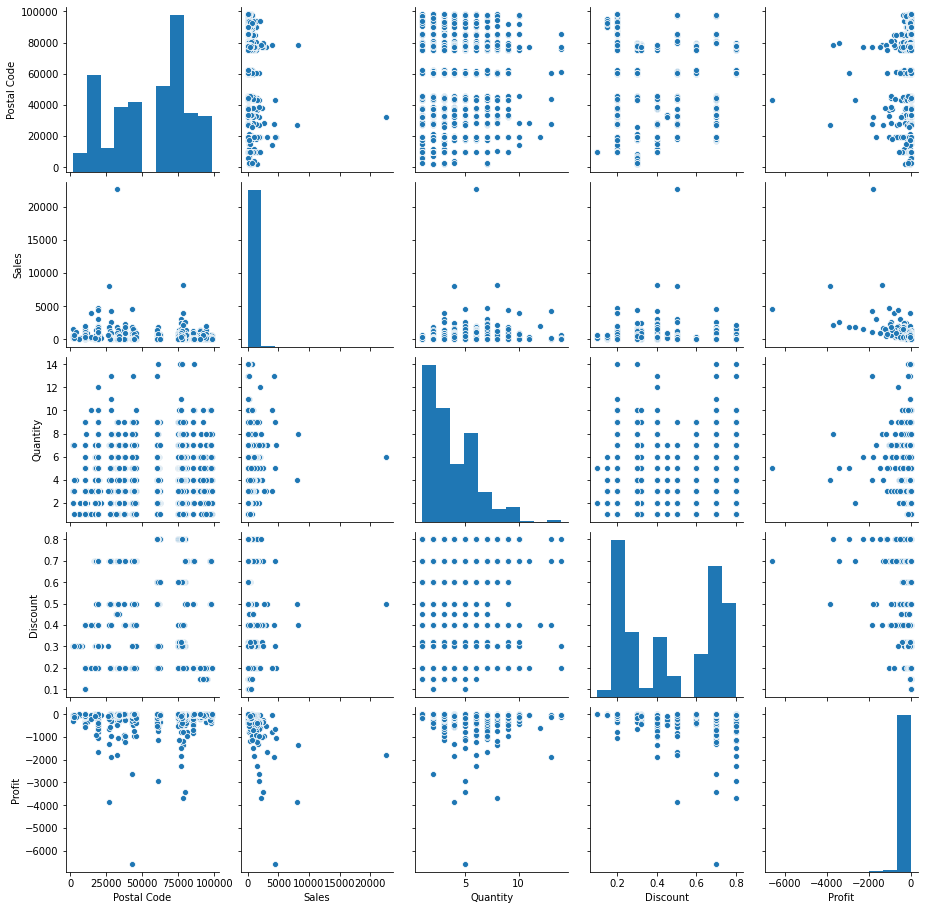

In [98]:
sns.pairplot(Loss)

By the above graph we can conclude that as Discount increases loss is also increasing

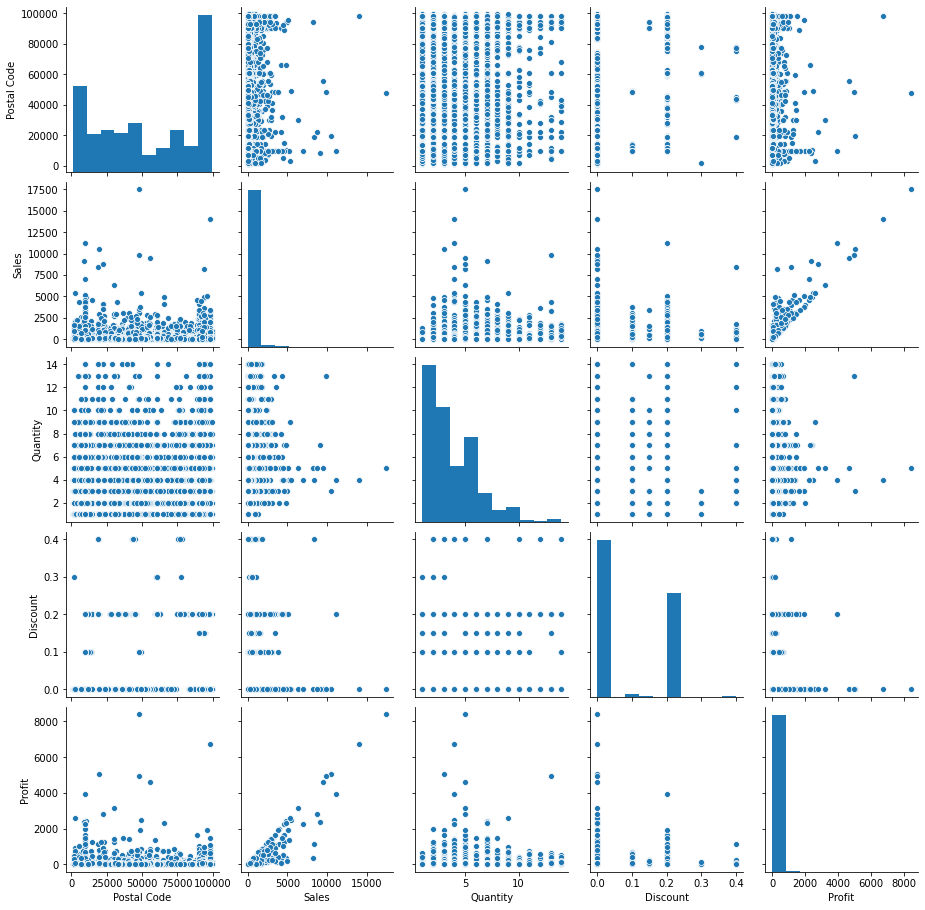

In [99]:
sns.pairplot(profit)

In [111]:
print(f'Overall profit : {df.Profit.sum()}')
print(f'Loss : {Loss.Profit.sum()}')
print(f'Profit without loss :{profit.Profit.sum()}')

Overall profit : 286241.4226
Loss : -156112.98990000002
Profit without loss :442354.4125


By the above graph we can conclude that as Discount decreasing, profit is increasing and sales are directly proportional to the profit

#Conclusion


1.Company Performance
> Overall Company Performance is great. A good thing is that the company is generating more profits than loss so we can cover up the loss.

2.Company weak areas
> Pennsylvania,Texas,Ohio,Illinois are the some of the states which are facing huge loss.company should focus more on this areas to increase profits.

3.Company strong areas
> New York,California,Washington,Michigan are the some of the states which are generating huge profits when compared to the other cities. Company should constantly increase production in this areas to increase profits

4.Sales and Profits 
> one good thing about the company is that as the sales are increasing profits are also increasing.

5.Segments
> consumer segment and corporate segment are getting more profits in Standard class and company should manage this to get good profits 

6.Ship Modes
> Profit coming from the Standard class is high when compared to other classes

7.Category
> Technology and Office supplies category are the things with high profit

The company should decrease discounts to increase their profits and can even increase the production of copiers and accessories because this two categories can increase the stamina and profits.

## Risk Factors
> The company should focus more on Pennsylvania,Texas,Ohio,Illinois and take right decisions according to the problems because the loss generating here in this states are huge and can lead to financial crisis to the overall company.

> Providing huge discounts can lead to the financial loss